# Paso 1. Descargar los datos

In [1]:
# Importamos todas las librerías que necesitamos para nuestro proyecto.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# Leemos el archivo CSV y lo guardamos en el dataset gym.
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Queremos saber cómo se compone nuestro dataset.
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Una vez vemos cómo está conformado nuestro dataset, nos damos cuenta que no hay valores nulos. Sin embargo, debemos ajustar un poco nuestros datos para poder manejarlos mejor.

In [4]:
# Unificamos los nombres de las columnas solo por facilidad.
gym.columns = gym.columns.str.lower().str.strip()
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Observar el dataset

In [5]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Usando nuestro método describe(), a primer vistazo nos damos cuenta que la variable Churn tiene una media de 0.265, lo que significa que aproximadamente el 26.5% de los clientes abandonaron el gimnasio.

Por otra parte, podemos darnos cuenta que tenemos variables con escalas muy diferentes. Por lo cual, nos sugiere que para nuestra predicción, necesitaremos estandarizar los datos. Tal es el caso de: 
- age: entre 18 y 41
- avg_additional_charges_total: entre 0.14 y 552.59
- lifetime: entre 0 y 31

Adicionalmente, nos damos cuenta que, de acuerdo con nuestra media y desviación estandar, la mayoría de las personas viven otrabajan cerca del gym y que la mayoría de personas no van en grupo.

# Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

## Observar los valores medios de las características en dos grupos

In [6]:
gym.groupby('churn')[['age', 'avg_class_frequency_total', 'lifetime']].describe().T

churn                                      0            1
age                       count  2939.000000  1061.000000
                          mean     29.976523    26.989632
                          std       3.009933     2.895163
                          min      19.000000    18.000000
                          25%      28.000000    25.000000
                          50%      30.000000    27.000000
                          75%      32.000000    29.000000
                          max      41.000000    38.000000
avg_class_frequency_total count  2939.000000  1061.000000
                          mean      2.024876     1.474995
                          std       1.016006     0.694705
                          min       0.000000     0.000000
                          25%       1.283137     1.010771
                          50%       2.043252     1.491187
                          75%       2.732944     1.956438
                          max       6.023668     3.478646
lifetime                  count  2939.000000  1061.000000
                          mean      4.711807     0.990575
                          std       3.874780     1.110799
                          min       0.000000     0.000000
                          25%       2.000000     0.000000
                          50%       4.000000     1.000000
                          75%       6.000000     1.000000
                          max      31.000000     9.000000

¿Qué nos quieren decir nuestros grupos? Que el grupo de personas que cancelaron es muy variado en edad (18 a 38 años) y que su edad promedio es de 27 años. Que estos iban por semana 1 día y medio en promedio, máximo 3 días por semana. Que el tiempo que duró el cliente desde que llegó la primera vez fue en pormedio de 1 mes.

A diferencia de los que se quedaron, que en promedio son un poco mayores (30 años), frecuentaban el gimnasio un promedio de 2 veces por semana (siendo el máximo de veces 6 días) y su duración promedio desde que llegaron por primera vez a la fecha es de 4 meses, siendo los que más han durado de 31 meses.

## Trazar histogramas de barras

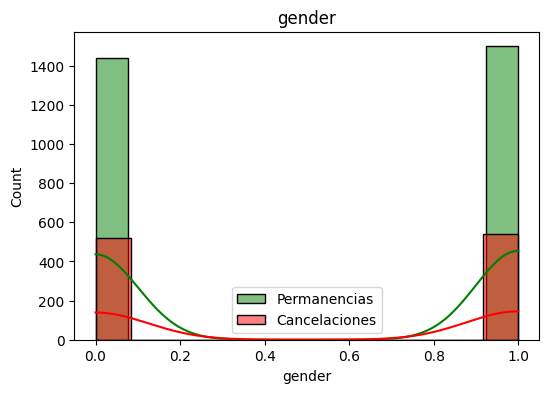

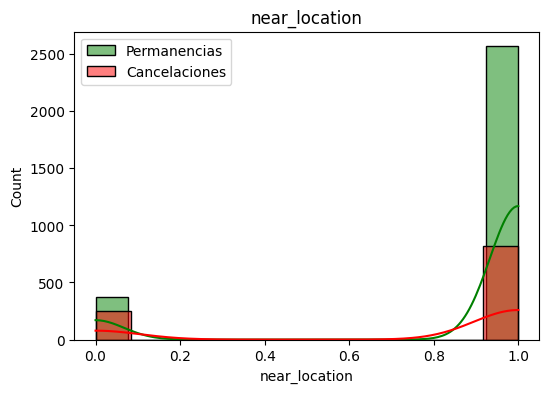

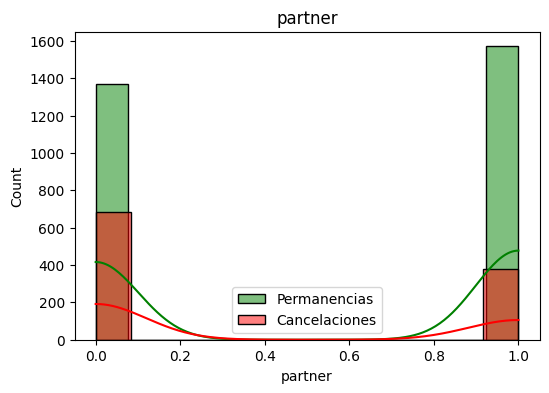

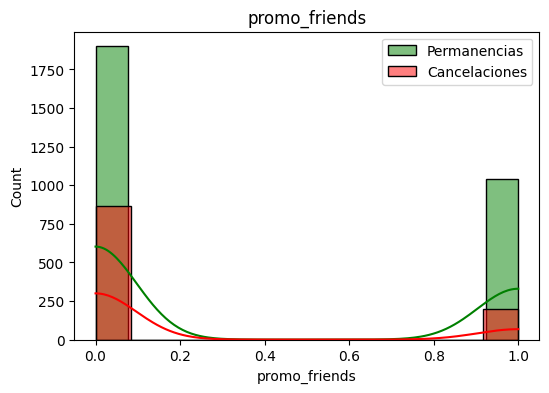

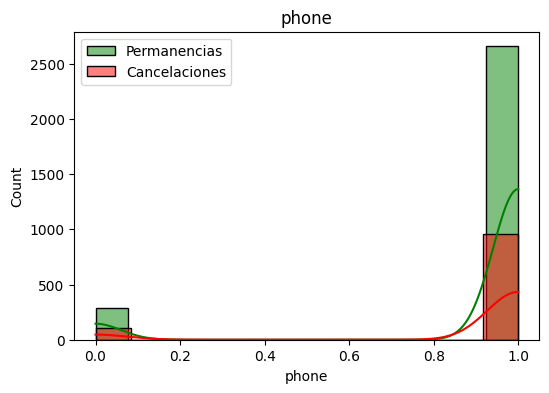

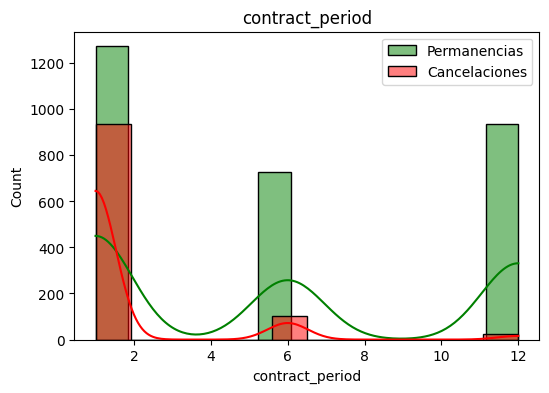

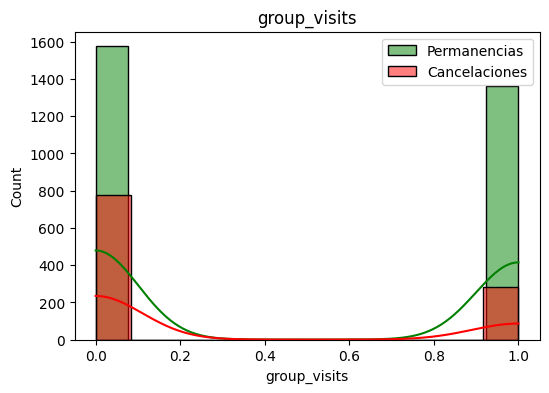

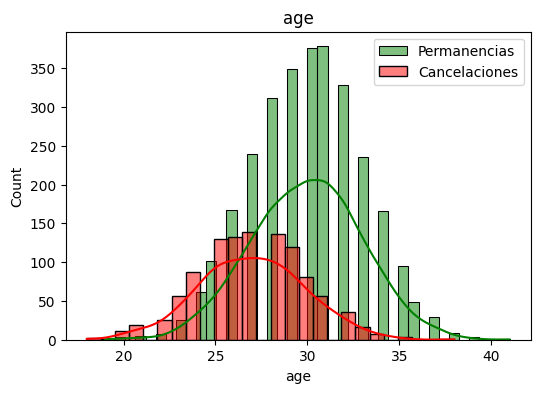

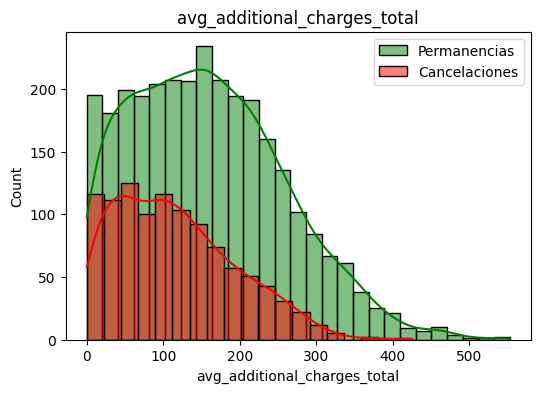

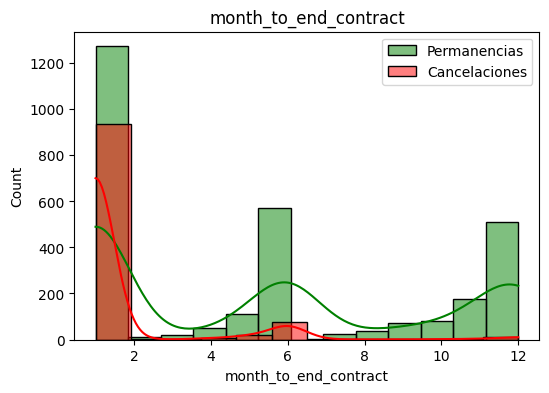

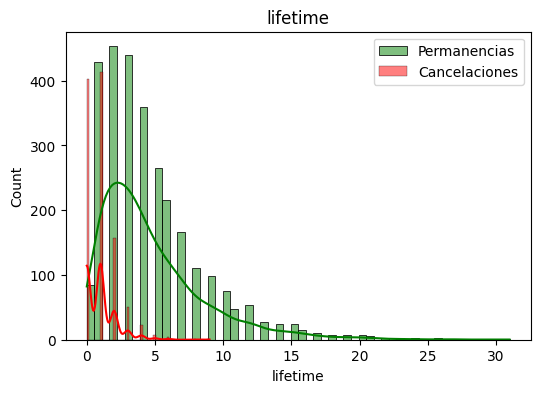

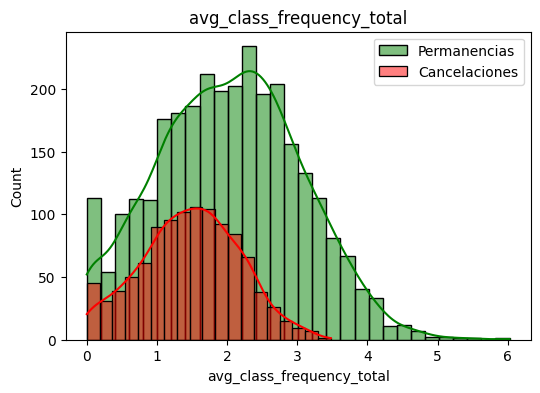

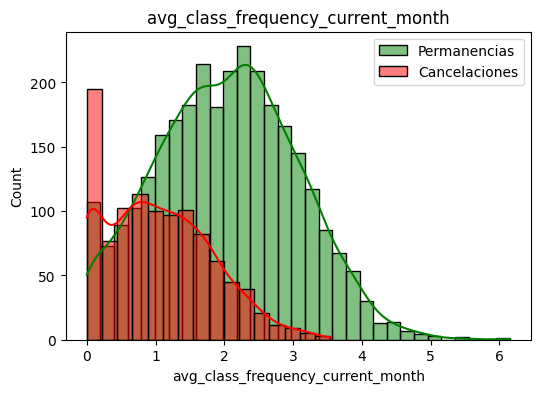

In [7]:
features = gym.columns.drop('churn')

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(gym[gym['churn'] == 0][col], color='green', label='Permanencias', kde=True)
    sns.histplot(gym[gym['churn'] == 1][col], color='red', label='Cancelaciones', kde=True)
    plt.title(col)
    plt.legend()
    plt.show()

Teniendo en cuenta los histogramas, podemos observa diferencias claras en:

En age, podemos notar que los clientes que más cancelan están concentrados en las edades entre 20 a 25 años. Puede ser que los clientes más jóvenes tiendan a cancelar más porque deben desplazarse más o deben cambiar de estilo de vida y les cueste más trabajo.

En contract_period, vemos que los clientes que permanecen, tienen contratos de duración media, mientras que los que cancelan tienden a tener contratos con períodos cortos de duración (entre 1 a 3 meses). Los contratos cortos tienen mayores tasas de deserción.

En avg_class_frequency_current_month, los clientes que se quedan (permanecen) tienen una distribución más amplia (más de 4 meses). Mientras que los que cancelan se concentran entre los 0 y dos meses. Esto nos indica que los primeros dos meses son críticos para la retención de clientes.

En lifetime, el pico se concentra en 2 visitas por semana para aquellos clientes que permanecen, mientras que los que cancelan se concentran más eb cero y un visitas por semana. Esta baja actividad predice la cancelación, ya que no son clientes que tengan una frecuencia mínima de asistencia y por ende, al notar menos evolución en su ejercicio haga que se sientan menos motivados a quedarse.

En month_to_end_contract, la distribución de las permanencias es más uniforme, mientras que en la de cancelaciones hay un pico en contratos que están por vencer (1 a 2 meses). Acá podemos identificar que el segundo mes es el momento crítico para la renovación.

## Crea una matriz de correlación

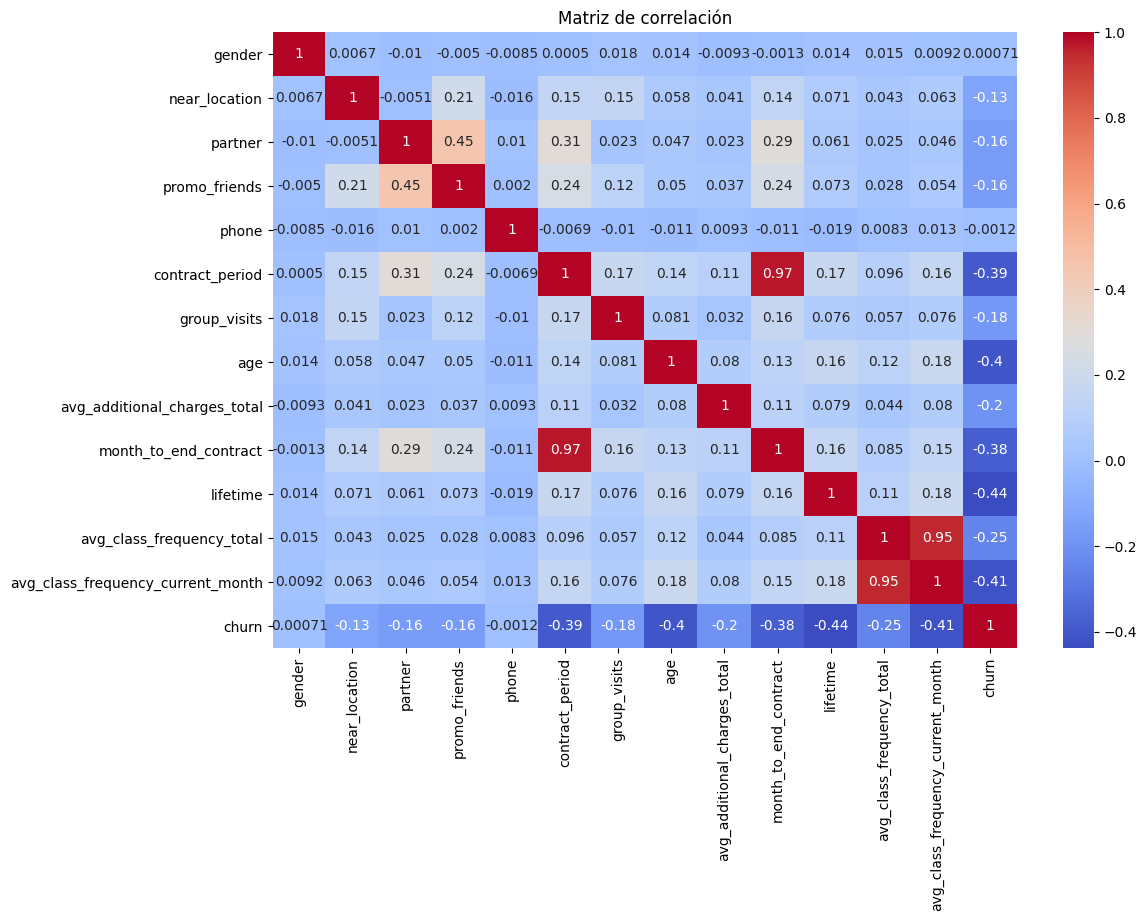

In [18]:
# trazamos el mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(gym.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Viendo nuestra matriz de correlación podemos inferir que las variables más correlacionadas con Churn suelen ser:

Lifetime (negativa) porque, a mayor tiempo de permanencia en el gimnasio, menor probabilidad de cancelar.

Avg_class_frequency_current_month (negativa) porque a mayor frecuencia de clases en el mes actual, menor probabilidad de cancelar.

Month_to_end_contract (negativa) porque a más meses restantes en el contrato, menor probabilidad de cancelar.

En menos medida, vemos correlaciones de variable con Churn como:

Age (negativa) porque a mayor edad, menor probabilidad de cancelar. Los clientes más jóvenes tienden a cancelar más y esto confirma lo que observamos en los histogramas.

Contract_period (negativa) por que a mayor duración del contrato, menor probabilidad de cancelar. Los contratos cortos están asociados con mayor riesgo.

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

In [20]:
# Preparamos los datos
X = gym.drop('churn', axis=1)
y = gym['churn']

In [21]:
# Dividimos los datos en conjuntos de entrenamiento y validación utilizando train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Realizamos nuestro entrenamiento con regresión logísitica. Utilizamos max_iter=1000 para asegurar la convergencia del modelo y random_state=42 para garantizar resultados reproducibles.
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('Regresión Logística')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))

Regresión Logística
Accuracy: 0.91625
Precision: 0.8729281767955801
Recall: 0.7821782178217822


In [25]:
# Ahora lo realizamos con bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('Random Forest')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.91
Precision: 0.8494623655913979
Recall: 0.7821782178217822


Si comparamos nuestros modelos podemos decir que presentan resultados muy similares, a pesar de que sepamos, de antemano, que Random Forest obtiene mejores valores de recall y accuracy (que si lo son pero muy leves).

Si debemos escoger entre alguno de los dos, nos iríamos por el más robusto para capturar patrones complejos que es el Random Forest.

Como para la empresa (Gimnasio) es mejor invertir en retener a alguien con alta probabilidad de cancelar -ya que obtiene un mayor retorno de inversión- queremos optimizar mis recursos basados en predicciones, por ende nos da la porbabilidad más cercana de descerción para cada cliente y nos permite enfocar nuestros esfuerzos en ellos.

# Paso 4. Crear clústeres de usuarios/as

In [28]:
# Estandarizamos los datos
gym_clusters = gym.drop('churn', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(gym_clusters)

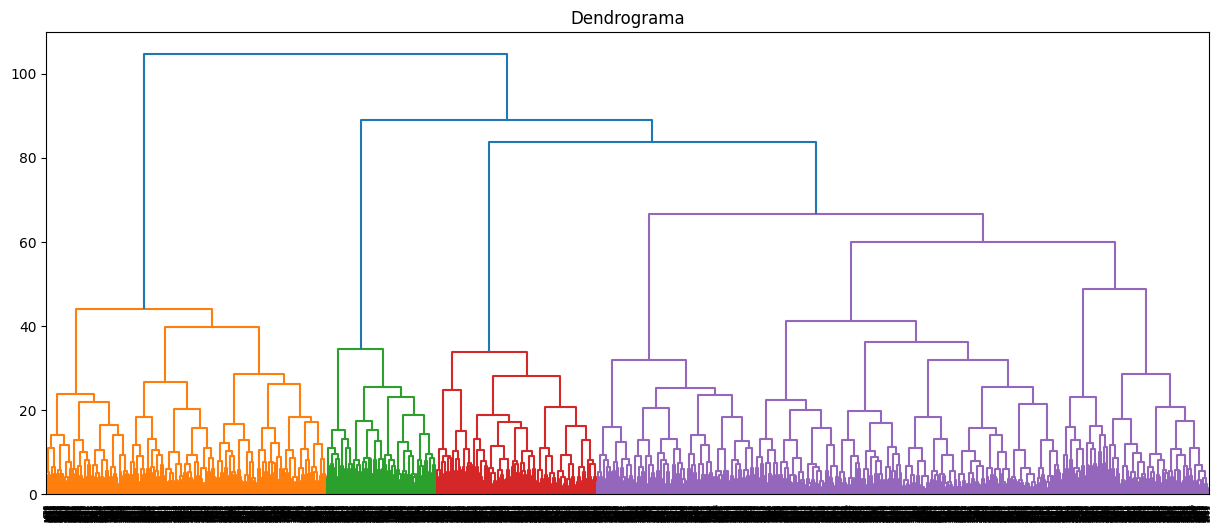

In [29]:
# Utilizamos la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

In [32]:
# Entrenamos el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. 
kmeans = KMeans(n_clusters = 5, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

gym['cluster'] = clusters

In [33]:
# Miramos los valores medios de característica para los clústeres.
gym.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


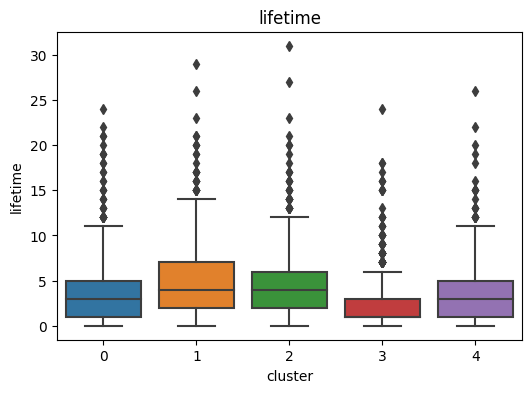

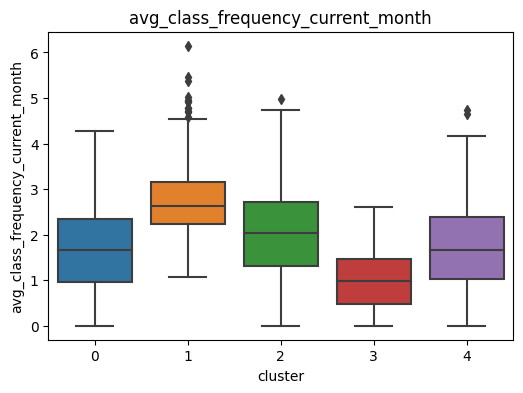

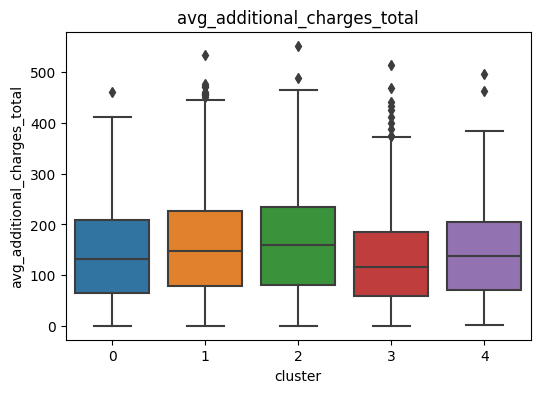

In [34]:
# Trazamos distribuciones de características para los clústeres.
for col in ['lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=col, data=gym)
    plt.title(col)
    plt.show()

In [35]:
# Calculamos la tasa de cancelación para cada clúster, usando el método groupby().
gym.groupby('cluster')['churn'].mean()

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64

Notamos cinco clústers, principalmente:

Clúster 0 tiene una tasa de cancelación de 24,6%, los cuales se concentran en aquellos que llegan por promociones de amigos y que, además, tiene contratos por períodos cortos, como vimos anteriormente.

Clúster 1 tiene una tasa muy baja de cancelación 8,9%, los cuales podemos decir que son los más leales. Asisten frecuentemente (alrededor de 3 veces por semana), tiene mayor tiempo de permanencia (alrededor de 5 meses) y no están relacionados a contratos de promociones especiales.

Clúster 2 tienen una tasa de cancelación aún más baja(2,2%), lo que los hace aún más leales que nuestro clúster anterior. Tienen contratos muy largos (de casi un año), son los que halan más visitantes y tienen tiempos restantes de contratos más prolongados (casi una extensión de un año).

Clúster 3 tiene tasas de cancelación supremamente altas (57,3%). Son nuetros clientes con mayor riesgo de cancelación. Tienen contratos muy cortos de tiempo (menos de dos meses) y van por mucho una vez a la semana.

Clúster 4 tienen también una tasa de cancelación alta, como clúster 0, pero se caracterizan por que no tienen teléfono registrado y su actividad es moderada.

# Paso 5. Conclusiones y recomendaciones

Conclusiones clave:

Las cancelaciones están fuertemente relacionadas con: baja frecuencia de visitas, contratos cortos, poco tiempo de vida en el gimnasio.

Con nuestro modelo de Random Forest pudimos predecir mejor la cancelación que si hubiéramos utilizados la regresión logística.

Existen clústeres claramente diferenciados: clientes leales y activos y clientes nuevos y en riesgo.

Estás son algunas de las recomendaciones para el negocio:

Podemos realizar programas de retención en etapa temprana (antes de los dos meses).

Ofertas especiales para clientes con un Lifetime menor a 6 meses, para conservar su lealtad.

Realizar un seguimiento personalizado, que nos permita identificar en tiempo real las personas que no son tan disciplinadas y darles insentivos para que vayan por lo menos 3 veces por semana y empiecen a notar reultados.

Podemos ofrecer clases grupales gratuitas y retos mensuales de asistencia, con alguna gratificación al final.

Adicionalentente, se puede promover contratos largos y descuentos por renovación anual, así como beneficios exclusivos para contratos ≥ 6 meses.